# **Predicting Potential Customers for a EdTech Startup**

----------------------------
## **Objective**
-----------------------------

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. The goal is to use the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.

--------------------------
## **Data Description**
--------------------------

* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* **first_interaction:** How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
* **profile_completed:** What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** The number of times a lead has visited the website
* **time_spent_on_website:** Total time (seconds) spent on the website.
* **page_views_per_visit:** Average number of pages on the website viewed during the visits
* **last_activity:** Last interaction between the lead and ExtraaLearn 
    * **Email Activity:** Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
    * **Phone Activity:** Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
    * **Website Activity:** Interacted on live chat with a representative, updated profile on the website, etc.

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not. The class 1 represents the paid customer and class 0 represents the unpaid customer.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
learn = pd.read_csv("ExtraaLearn.csv")

In [3]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [6]:
# Understand the shape of the dataset
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.** 

In [7]:
# Check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest of the columns are of object type.

* There is no missing data in the dataset.

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [9]:
# get the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
* There are 4612 observations, and there is no missing value for the above numerical variables.
* The average age of customers (paid & unpaid) is 46.2, the range is quite wide: from 18 to 63 years old, more than 50% are over 50 years old.
* On average, the leads visited the website 3.6 times; while the middle 50% of the leads visted 2 to 5 times, some visited many more time with the maximum number of visits being 30 times. This represents a right-skewed distribution.
* The average time spent on the website is about 12 minutes. Again, this is a right skewed distribution as the maximum value almost doubles the 75 percentile value. 

In [10]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [11]:
# Checking the number of unique values
data["ID"].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [12]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

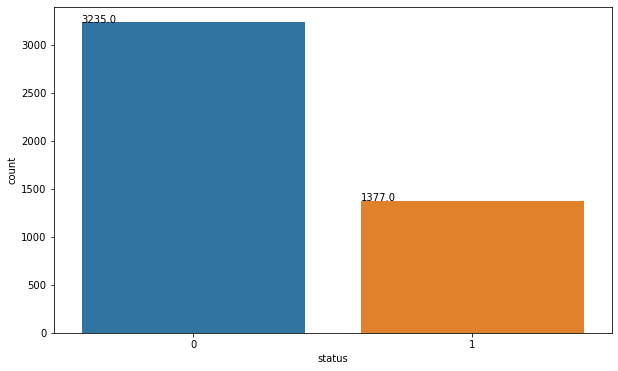

In [13]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted. This is an imbalanced dataset.

**Let's check the distribution and outliers for numerical columns in the data**

age
Skew : -0.72


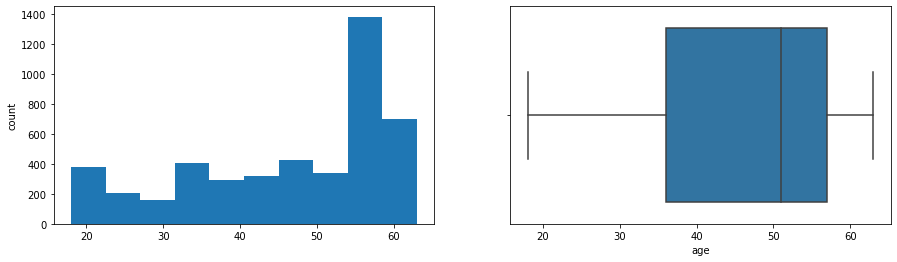

website_visits
Skew : 2.16


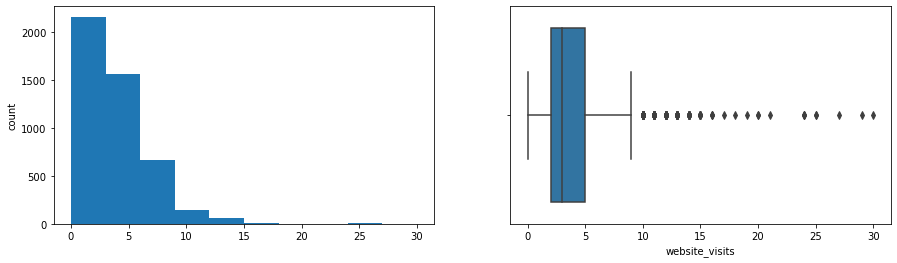

time_spent_on_website
Skew : 0.95


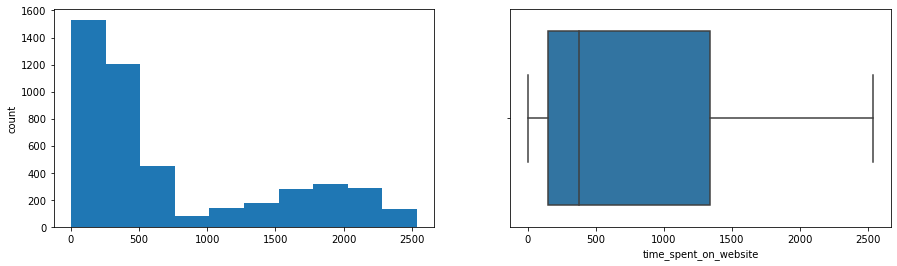

page_views_per_visit
Skew : 1.27


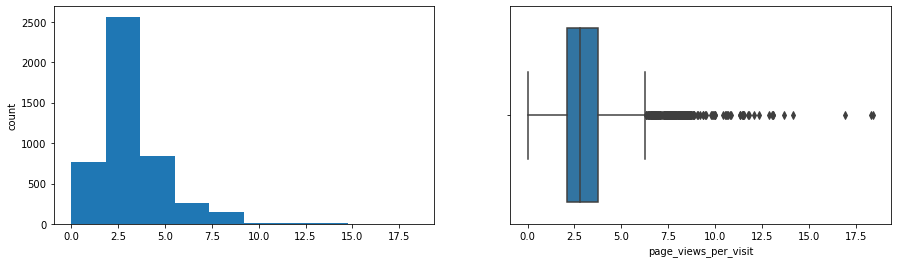

In [18]:
# plot histogram and box plots
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))    
    
    plt.subplot(1, 2, 1)    
    data[col].hist(bins = 10, grid = False)    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**
* The age variable has a left skewed distibution with a medium of slightly over 50 years old. The age has a high spike between 50-60 years old while the distribution between 20 to 50 are quite even. There is no outliers.
* The website_visits has a right skewed distribution with a long tail and many outliers on the right. The most frequent distribution in the histogram is between 0 to 2-3 times, the middle 50% of leads visted between 1-5 times. However there are a few leads visited the website over 20 times. 
* There seems to be 2 separate groups of leads observed in the distribution of time_spent_on_website with 2 different local modes. The first group of people spent about 0 to 10 minutes on the website, while the other group of people spent significantly longer time on the website compared to the 1st group. The 2nd group sent between 10 to 40 minutes. Overall, this variable is right skewed. 
* For 'page_views_per_visit', it is again right skewed with many outliers. Over half of leads visited 2-3 times, while the maximum time visited is over 17.5. 

### **Bivariate Analysis**

**Check conversion numbers by lead type**

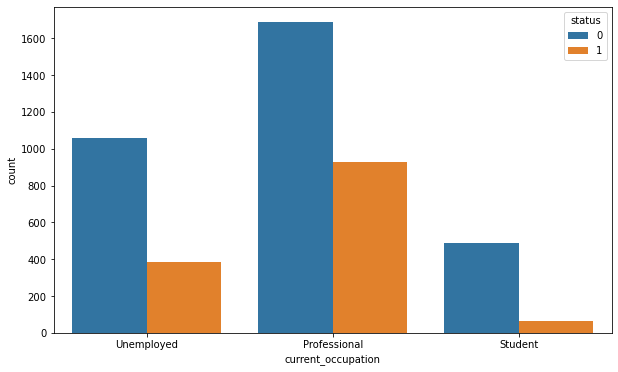

In [19]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'current_occupation', hue = 'status', data = data)
plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads.**

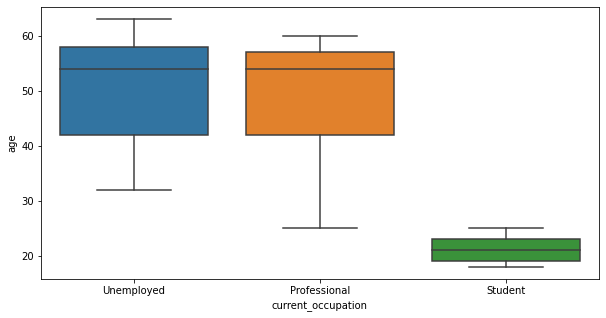

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(data["current_occupation"], data["age"])
plt.show()

In [21]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

**Check if the channels of the first interaction have an impact on the conversion of leads.**

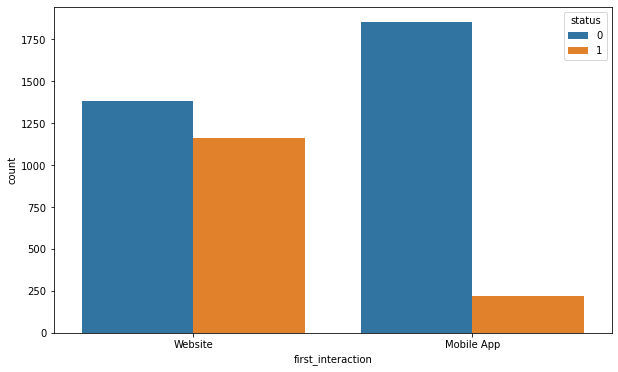

In [22]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'first_interaction', hue = 'status', data = data)
plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.

**Check if spending more time on websites results in conversion.**

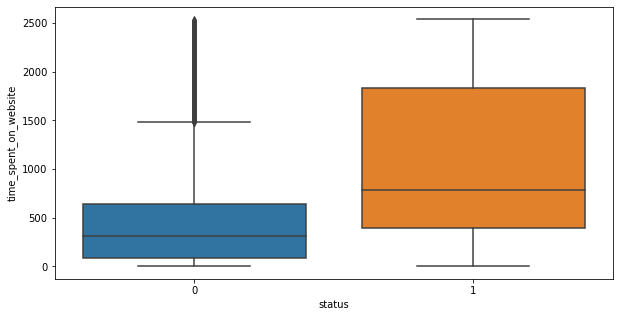

In [23]:
# Create a boxplot for variables 'status' and 'time_spent_on_website
plt.figure(figsize = (10, 5))
sns.boxplot(data=data,x='status', y='time_spent_on_website')
plt.show()

**Observations:**
* The range of non-paying customers' time spent are largely the same with the range of paying customers' time spent. 
* However, the medium time spent on website is lower for non-paying customers (i.e., below 500 seconds), compared to the paying customers (over 500 seconds). 
* The middle 50% of non-paying customers spent between approximately 0 to 10 minutes, while the middle 50% of paying customesr spent between approximately 7 to 30 minutes. 
* There are many outliers for non-paying customers.

**Check if the profile completion level has an impact on lead coversion**

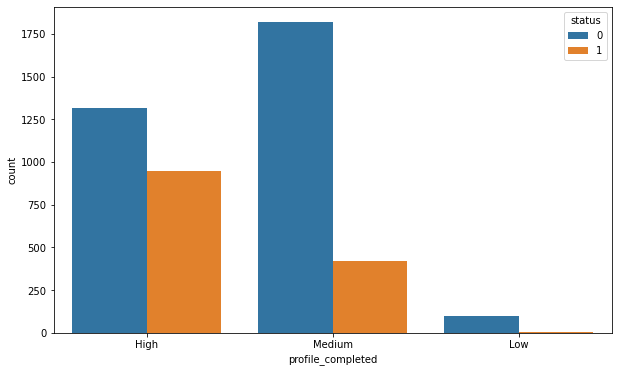

In [24]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'profile_completed', hue = 'status', data = data)
plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Referrals from a converted lead can be a good source of income with a very low cost of advertisement.Check how referrals impact lead conversion status.**

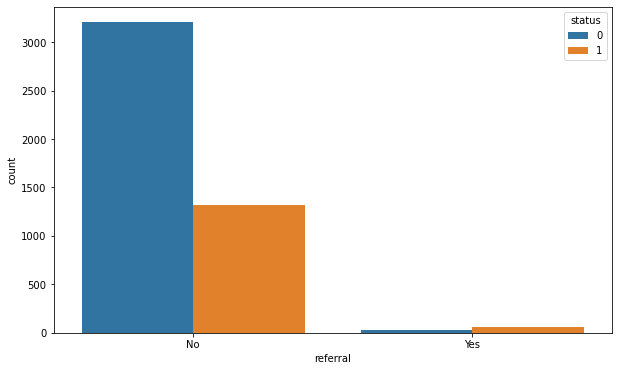

In [25]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'referral', hue = 'status', data = data)
plt.show()

**Observations:**
* There are a very less number of referrals but the conversion is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

**Plot the correlation heatmap**

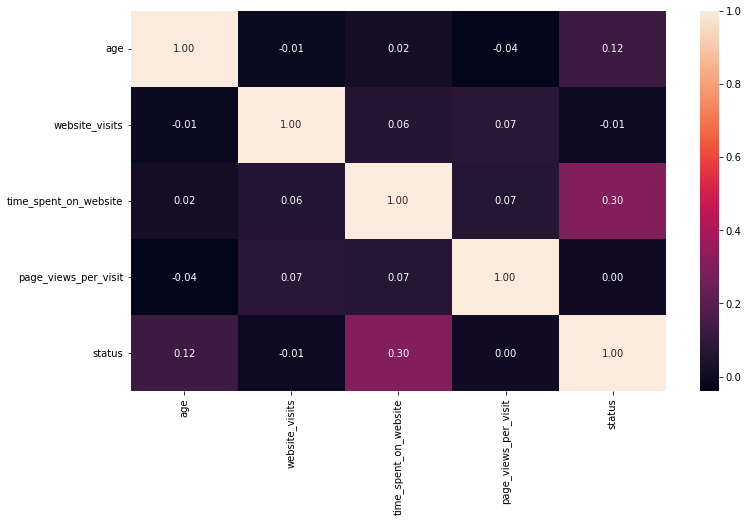

In [26]:
plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.show()

**Observations:**
* age is slightly positively correlated with status (coefficient is 0.12).
* website_visits does not have strong correlation with other variables.
* time_spent_on_website has some positive correlation with status (coefficient is 0.3)
* page_views_per_visit does not have strong correlation with other variables.

## **Data preparation for modeling**

In [27]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')
Y = data['status']

In [28]:
# Creating dummy variables for categorical variables
X = pd.get_dummies(X, drop_first = True)

In [30]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, stratify=Y)

**Checking the shape of the train and test data**

In [31]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.701363
1    0.298637
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.70159
1    0.29841
Name: status, dtype: float64


## **Building Classification Models**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer. (False Negative)
2. Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer. (False Positive)

**Costs of error to the busniess:** 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 
* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer (False Negative) is a greater loss for the organization.

**To reduce the losses:**

* Company would want `Recall` to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives. 

In [32]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))    
    cm = confusion_matrix(actual, predicted)    
    plt.figure(figsize = (8, 5))    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])    
    plt.ylabel('Actual')    
    plt.xlabel('Predicted')    
    plt.show()

### **Decision Tree**

In [33]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



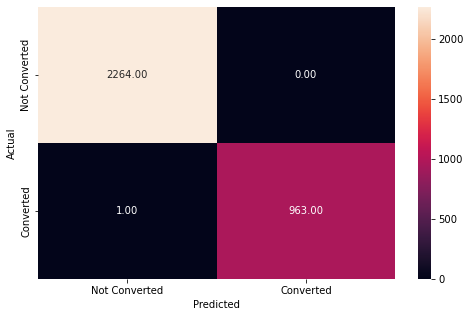

In [34]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       971
           1       0.70      0.68      0.69       413

    accuracy                           0.82      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.82      0.82      1384



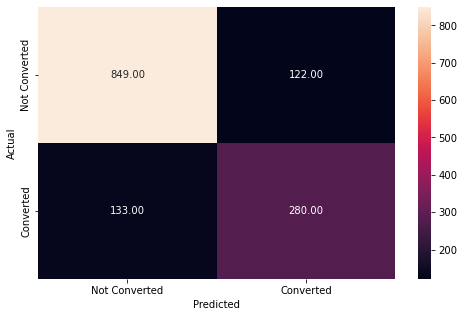

In [35]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

**Observations:**

- The Decision Tree works well on the training data but not so well on the test data as the recall for class 1 is <0.7 in comparison to 1 for the training dataset. The Decision Tree is overfitting the training data.
- About 32% (1-0.68) of paying customer cannot be identified with this model, and thus, the company may lose business on those customers. 
- At the same time, based on the precision score of class 1, out of all the leads the model predicts as paying customers, 30% (1-0.7) will not eventually convert. Thus, the business may waste time on those non-converting leads by assuming they would pay. 

### **Decision Tree - Hyperparameter Tuning**

In [37]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      2264
           1       0.59      0.89      0.71       964

    accuracy                           0.78      3228
   macro avg       0.76      0.81      0.77      3228
weighted avg       0.84      0.78      0.79      3228



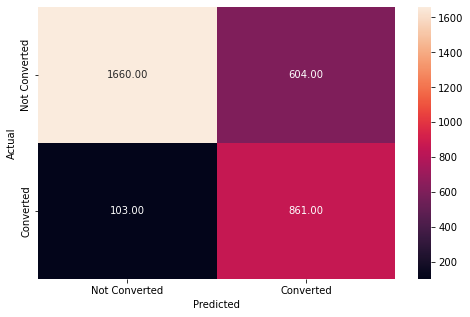

In [38]:
# Checking performance of the tuned Decision Tree model on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

**Observations:**
- In comparison to the model with default values of hyperparameters, the performance (both recall and precision) on training set has gone down significantly. It makes sense as we are making the model with less levels to reduce the overfitting. 

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       971
           1       0.62      0.92      0.74       413

    accuracy                           0.81      1384
   macro avg       0.79      0.84      0.79      1384
weighted avg       0.86      0.81      0.81      1384



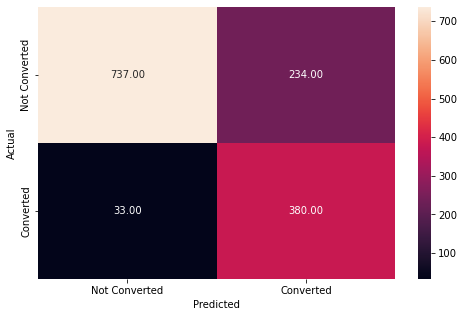

In [39]:
# Checking performance of the tuned Decision Tree model on the test data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Observations:**
- The tuned model has a higher class 1 recall score than the default model on the test data (0.92 vs 0.70), this is desirable. 
- Although the class 1 precision score decreased slightly compared to the default model, the precision score is less important. 
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.

**Visualize the tuned decision tree** and observe the decision rules:

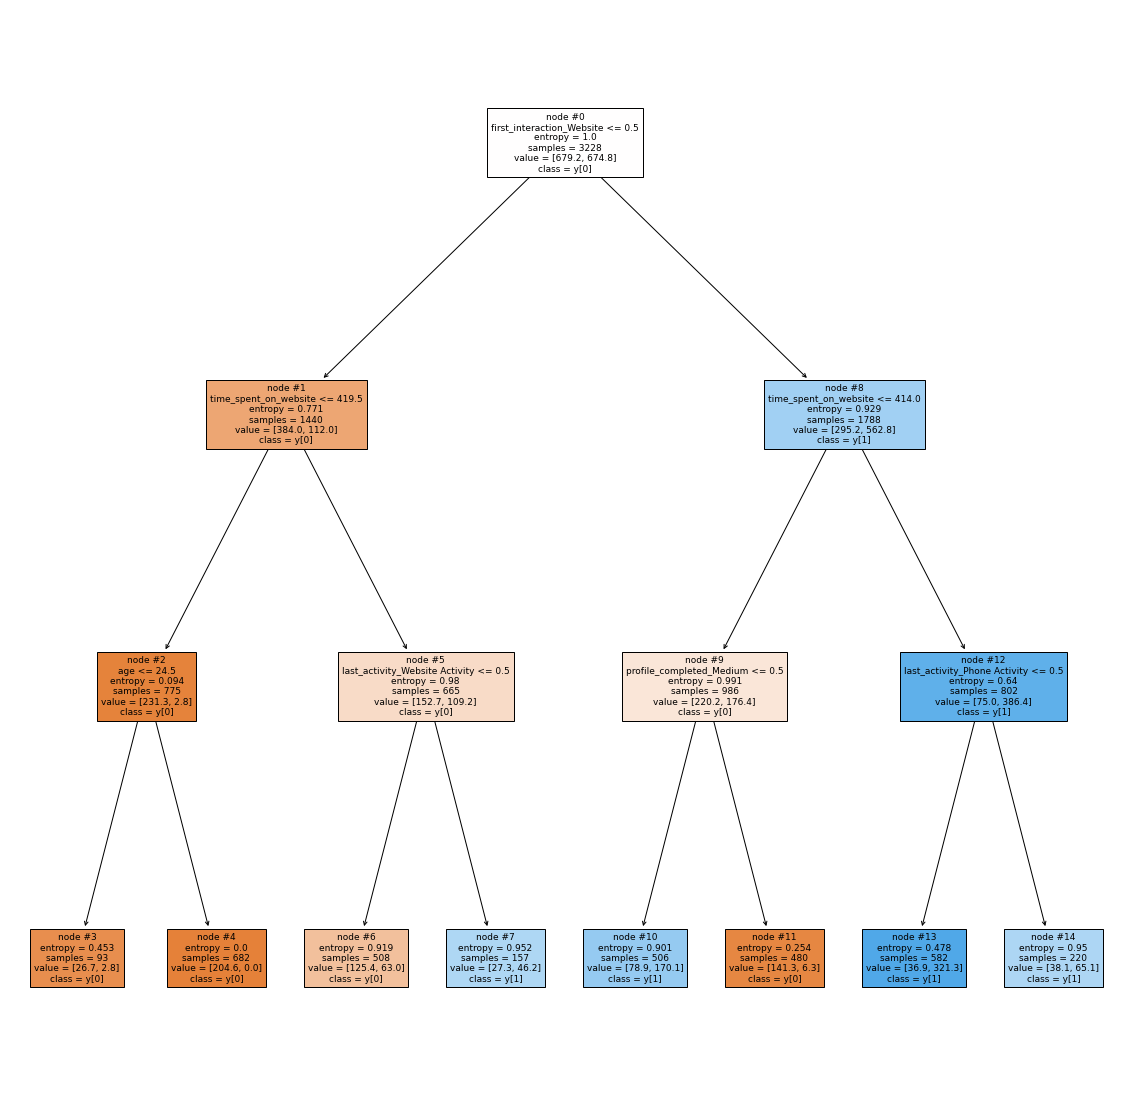

In [40]:
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
- For younger leads (below 25 years old) who have their first interaction through mobile, if the overall time spent on the website is lower than 7 minutes, they are likely to be non-paying leads (not converted). These leads may be students who are not that serious about considering paying for additional online courses.
- For leads started their first interaction through mobile, if they subsequently spend over 7 minutes on the website and had their last interaction via website activity, they are likely to be converted to paying customers. Those leads may initially find out about the company on their mobile phones, but used the website to understand more about its offerings and decided to pay for the services. 
- For leads started their first interaction throught the website, they are quite likely to convert to paying customers if they spent over 7 minutes on the websit and are over 25 years old. Those people may represent working professionals and unemployeed people who are more seriously looking for courses offered to enhance their skills or land a new job. 
- For leads started their first interaction throught the website, if they spent less than 7 minutes on the website and are not in the group of people who completely their profile at a medium level, they are also likely to be converted to paying customers. That must represents people who completely their profile at a high level as very few paying customers only completely their profile at a low level, based on the result of the EDA above. 

**Let's look at the feature importance** of the tuned decision tree model

### **Random Forest Classifier**

In [41]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(criterion='entropy', class_weight = {0: 0.3, 1: 0.7},random_state=7)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



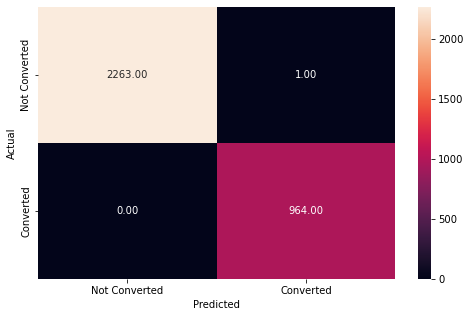

In [42]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

**Observations:**
- The Random Forest is giving a 100% score for all metrics on the training dataset, very likely to be overfitting.

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.72      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



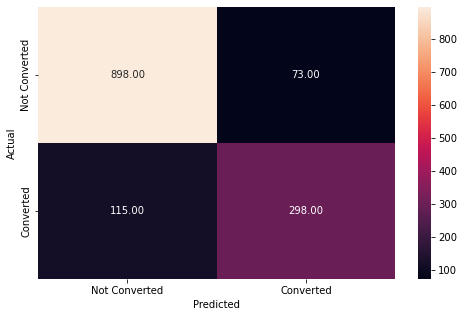

In [43]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Observations:**
- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 0.72 for class 1.

### **Random Forest Classifier - Hyperparameter Tuning**

In [76]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", class_weight = {0: 0.3, 1: 0.7}, random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2264
           1       0.67      0.86      0.75       964

    accuracy                           0.83      3228
   macro avg       0.80      0.84      0.81      3228
weighted avg       0.85      0.83      0.83      3228



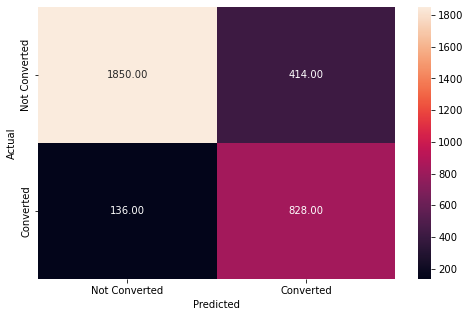

In [77]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.95      0.83      0.88       971
           1       0.69      0.89      0.78       413

    accuracy                           0.85      1384
   macro avg       0.82      0.86      0.83      1384
weighted avg       0.87      0.85      0.85      1384



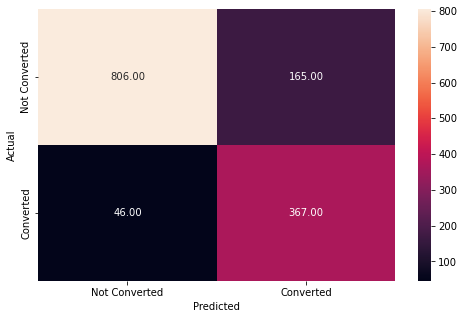

In [78]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

**Observations:**

- The tuned model is not overfitting anymore .
- Same for the test data, the recall for class 1 has improved with a small decrease in precision.
- Overall, it seems this model is the best-performing one among all the models so far, and is giving us a good recall score and a reasonable precision score on the test dataset.

### Comparing Model Performances

In [79]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [80]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    b = []  
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) 
    b.append(test_precision) 
    
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b

In [81]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,x_train=X_train,x_test=X_test):
    c = [] 
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    c.append(train_acc) 
    c.append(test_acc) 
    
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c

In [82]:
# Make the list of all the model names 
models = [d_tree, d_tree_tuned, rf_estimator, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [86]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}, index=range(1,5))
comparison_frame


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
1,Decision Tree,0.999690,0.815751,0.998963,0.677966,1.000000,0.696517
2,Tuned Decision Tree,0.780979,0.807081,0.893154,0.920097,0.587713,0.618893
3,Random Forest,0.999690,0.864162,1.000000,0.721550,0.998964,0.803235
4,Tuned Random Forest,0.829616,0.847543,0.858921,0.888620,0.666667,0.689850


## **Conclusion and Recommendations**

### **Conclusions:**

- The best model we have got so far is the tuned random forest model which is giving 88.9% recall for class 1 on the test data. 
- The company should use this model to gain insights on which leads are likely to be converted to paying customers. 
- Time spent on website, first_interaction_website, profile_completed, and age seem to be the most important features.

### **Business Recommendations**
- It seems the website is working relatively well in terms of converting leads whose first interaction is through the website. Thus, the company should try to further increase the traffic to its websit so that more leads can have their first interaction via website. Possible ways may include promoting the websites through Google search and other online advertisement platforms to target users. 
- Currently, the conversion rate of leads with first interaction through mobile app is low. The company should look into how to enhance the mobile app design such as information presented and user experience, so that the mobile conversion rate will improve. 
- The company should try to reach more working professionsalleads as that segment appear to have highest conversion rate, probably due to their higher fee-paying capabilities. 
- We should optimize the website design to make the information presented more interesting and relevant to potential leads to increase their time spent on the website. It appears that the more time the leads spent on the website, the more likely they are to purchase the courses. 
- The conversion rate of leads from referral is very high, however, the number of referrals are still very low. As referral appears to be an highly effectively way of customer acquisition, the business should create better programs to incentivize existing customers to conduct referrals to target population. 